<a href="https://colab.research.google.com/github/Nickan/FastAIStudy/blob/master/Lesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *

urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el => JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

In [3]:
classes = ["black", "teddy", "grizzly"]
# from google.colab import files
# files.upload()

Saving black.txt to black.txt
Saving grizzly.txt to grizzly.txt
Saving teddy.txt to teddy.txt


{'black.txt': b'https://www.outdoorlife.com/resizer/F36yWMJOM_ROJm417qTcEUoYdRk=/760x570/arc-anglerfish-arc2-prod-bonnier.s3.amazonaws.com/public/PEJ56M3MAW43XPLUTPPXWVH2GU.jpg\nhttps://bloximages.newyork1.vip.townnews.com/jhnewsandguide.com/content/tncms/assets/v3/editorial/f/a1/fa15bb3b-15b9-5e16-8c36-af3e9a92cad3/5bbf9aaa048f0.image.jpg?resize=400%2C254\nhttps://www.theglobeandmail.com/resizer/Ts1b2YxUE39ibmYJsdjgQ3t9b7o=/1500x0/filters:quality(80)/arc-anglerfish-tgam-prod-tgam.s3.amazonaws.com/public/EFJEJFOMERDL5JOOTXQCXNVYEE\nhttps://cdn0.wideopenspaces.com/wp-content/uploads/2015/12/BlackBearMass-630x339.jpg\nhttps://upload.wikimedia.org/wikipedia/commons/0/08/01_Schwarzb%C3%A4r.jpg\nhttps://bear.org/wp-content/uploads/2017/10/Bear-by-pine.jpg\nhttps://defenders.org/sites/default/files/styles/meta_image/public/2019-04/black_bear_louisiana_clint_turnage_fws.jpg?itok=jVz3OFA_\nhttps://www.fws.gov/southeast/images/hero/louisiana-black-bear.jpg\nhttps://wdfw.wa.gov/sites/default/fil

In [5]:
path = Path('data/bears')
for cl in classes:
  dest = path/cl
  dest.mkdir(parents=True, exist_ok=True)
  download_images(cl + ".txt", dest, max_pics=200)
path.ls()

[PosixPath('data/bears/grizzly'),
 PosixPath('data/bears/black'),
 PosixPath('data/bears/teddy')]

In [0]:
for cl in classes:
  print(cl)
  dest = path/cl
  verify_images(path/cl, delete=True, max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [8]:
data.classes

['black', 'grizzly', 'teddy']

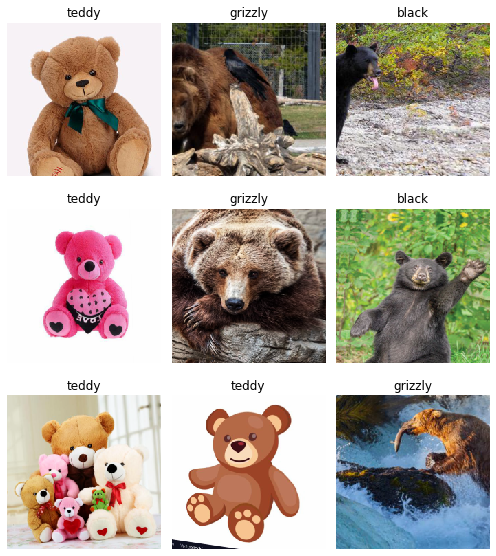

In [9]:
data.show_batch(rows=3, figsize=(7,8))

In [10]:
data,classes, data.c, len(data.train_ds), len(data.valid_ds)

(ImageDataBunch;
 
 Train: LabelList (216 items)
 x: ImageList
 Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
 y: CategoryList
 grizzly,grizzly,grizzly,grizzly,grizzly
 Path: data/bears;
 
 Valid: LabelList (53 items)
 x: ImageList
 Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
 y: CategoryList
 grizzly,black,grizzly,black,teddy
 Path: data/bears;
 
 Test: None, ['black', 'teddy', 'grizzly'], 3, 216, 53)

In [11]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 143MB/s]


In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.495330,0.258925,0.113208,00:07
1,0.822522,0.042737,0.018868,00:05
2,0.556957,0.083707,0.037736,00:04
3,0.420982,0.073772,0.037736,00:04


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


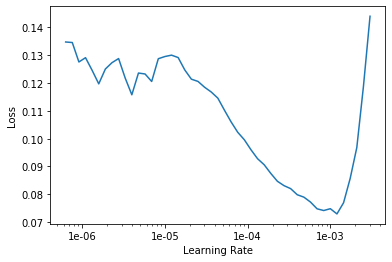

In [17]:
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(2, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.111169,0.032987,0.018868,00:05
1,0.099138,0.023536,0.018868,00:05


In [0]:
learn.save('stage-2')

In [20]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (216 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
grizzly,grizzly,grizzly,grizzly,grizzly
Path: data/bears;

Valid: LabelList (53 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
grizzly,black,grizzly,black,teddy
Path: data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True,

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

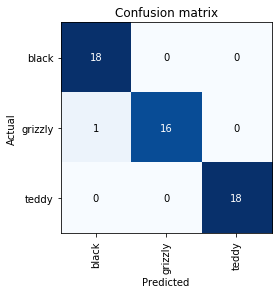

In [23]:
interp.plot_confusion_matrix()

Cleaning Up

In [0]:
from fastai.widgets import *

db = (ImageList.from_folder(path)
                .split_none()
                .label_from_folder()
                .transform(get_transforms(), size=224)
                .databunch())

In [27]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)
learn_cln.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (269 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
grizzly,grizzly,grizzly,grizzly,grizzly
Path: data/bears;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padd

In [30]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

In [44]:
img = open_image(path/'black'/'black_bear.jpg')
img

FileNotFoundError: ignored